# <font color='purple'>Cardio Good Fitness</font>

## <font color='purple'>Background</font>

Good Cardio Fitness is a retail store that has treadmill products as part of its inventory. The dataset contains information of the customers who have bought treadmill product(s) from the store.

## <font color='purple'>Objective: Preliminary Data Analysis</font>

Practice extracting observations of the data using exploratory data analysis. Complete the following:

1. Come up with a customer profile of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers

## <font color='purple'>Data Description</font>

* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run every week

## Import the necessary libraries
pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
# Suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading/manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## Load the data set

In [3]:
data = pd.read_csv('CardioGoodFitness.csv')

In [4]:
# copy data to another variable to avoid changes to original data
df = data.copy()

## View the first/last few rows of the dataset

In [5]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.tail(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Observations
* There is no description/price of the product--only product number
* Customers are likely all adults
* There is a large variability in age, education, income.
* Fitness is subjective and self-reported
* Usage and miles are customer's hopes/expectations

## Check the shape and info

In [7]:
# determine number of observations and columns
df.shape

(180, 9)

* There are 180 rows (observations) and 9 columns.

In [8]:
# check info, to see datatype & number of null values
df.info()
# object types may need to be converted, e.g., to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
# check for missing values
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Observations

* All columns have 180 observations. There are no missing values in any variables
* Product, gender, and marital status are read as 'object' but should be categorical variables.

### Fixing the datatypes

In [10]:
# Product, gender, and martical status should be converted to categorical type

df['Product'] = df.Product.astype('category')
df['Gender'] = df.Gender.astype('category')
df['MaritalStatus'] = df.MaritalStatus.astype('category')

In [11]:
# Check info to make sure variables have been converted properly
# This will also reduce data space required to store the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


* There are 4 numeric columns and 3 categorical columns
* Fitness is ordinal data, i.e., someone with fitness level 4 is not twice as fit as fitness level 2

## Summary of data

In [12]:
# get descriptive statistics of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


### Observations
* Age, income, and miles have relatively large standard deviations and the mean for all three variables are above the median. Thus, these variables are positively skewed. Additionally, the maximum values for these variables are rather large in comparison to the 3rd quartile, and consequently, may have outliers.
* Assuming 12 years education means high school graudate and 16 years means college graduate, all customers are at least high school graduates, and at least 50% of them have at least college education. There may be some outliers as the maximum value is much higher than the 3rd quartile, which is equal to the 2nd quartile.

In [13]:
# get descriptive statistics of non-numerical data
df.describe(exclude='number').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


### Check count of products
For binary categories like gender and marital status, the counts for each category are obvious, but it is not as obvious for product. 

In [14]:
print(df['Product'].value_counts())

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


### Observations
* There are 3 products. TM195 may be most affordable and TM798 may be most expensive
    - The most popular product is TM195
    - TM498 is slightly less popular
    - TM798 is least popular
* Most of the customers are men
* Most of the customers are partnered

# EDA

## Explore numerical variables first

In [15]:
# For any numerical variable, it is important to check central tendency and dispersion.
# Define a function to create a boxplot and histogram for an input variable (numerical column).
# Plot the boxplot and histogram on the same scale.
# This function definition was provided by Great Learning

def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):
    '''
    Boxplot and histogram on same scale
    data: dataframe
    feature: datafram column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default True)
    bins: number of b ins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Observations on Age

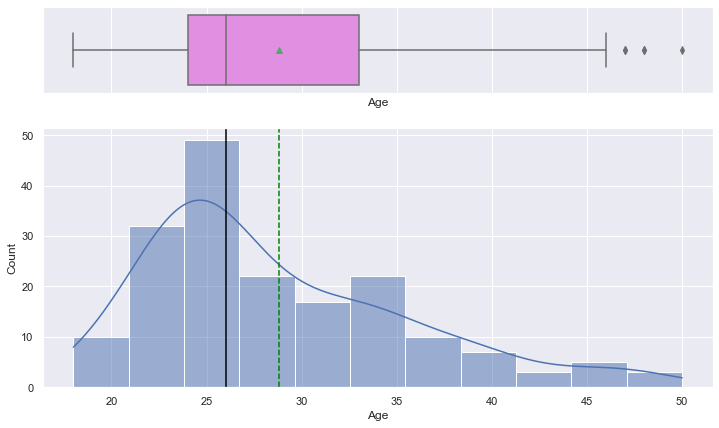

In [16]:
# Plot the boxplot and histogram of Age on the same scale
histogram_boxplot(df, 'Age')
plt.savefig('age_hist_box.jpg', bbox_inches='tight')

### Observations
* The distribution of age is right skewed
* Median age is approx 26 and mean age is approx 28
* There are a few outliers in this variable
* The majority of customers (>75%) are between 18 and 35, but there are customers as old as 50

## Observations on Education

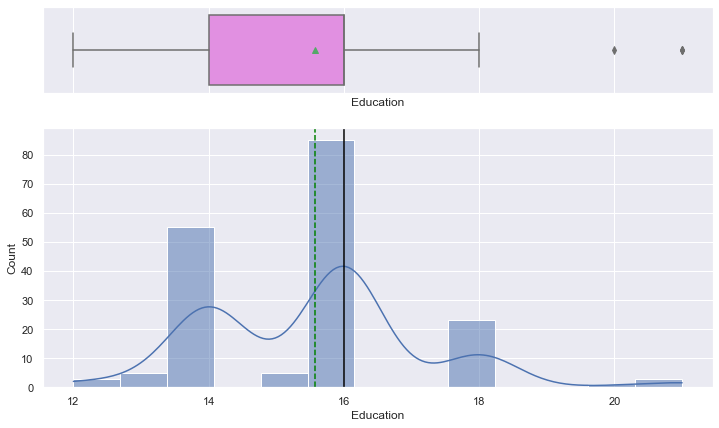

In [17]:
# Plot the boxplot and histogram of Education on the same scale
histogram_boxplot(df, 'Education')
plt.savefig('ed_hist_box.jpg', bbox_inches='tight')

### Observations
* Education is negatively skewed, with outliers in the positive direction.
* All customers are at least high school graduates
* Q2 = Q3
* The majority of customers (at least 75%) are college graduates, but there are a few that have as many as 9 years of education after high school

## Observations on Usage

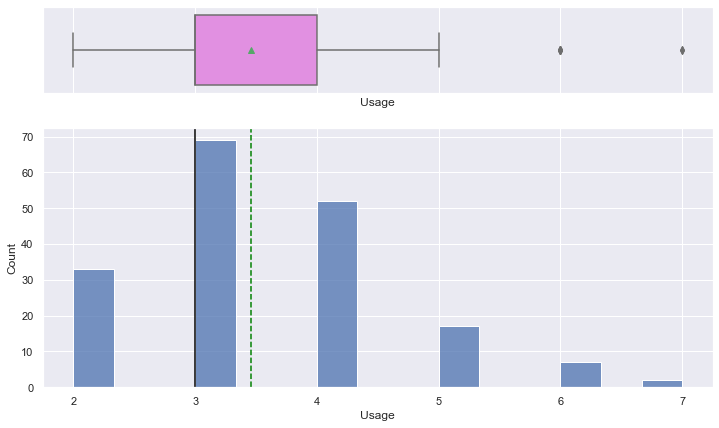

In [18]:
# Plot the boxplot and histogram of Usage on the same scale
histogram_boxplot(df, 'Usage', kde=False)
plt.savefig('use_hist_box.jpg', bbox_inches='tight')

### Observations
* Usage is positively skewed
* Some outliers in the positive direction
* Q1 = Q2
* Majority of customers planned to use the treadmill 2 to 4 times per week
* Everyone intended to use the treadmill at least 2 times per week

## Observations on Fitness

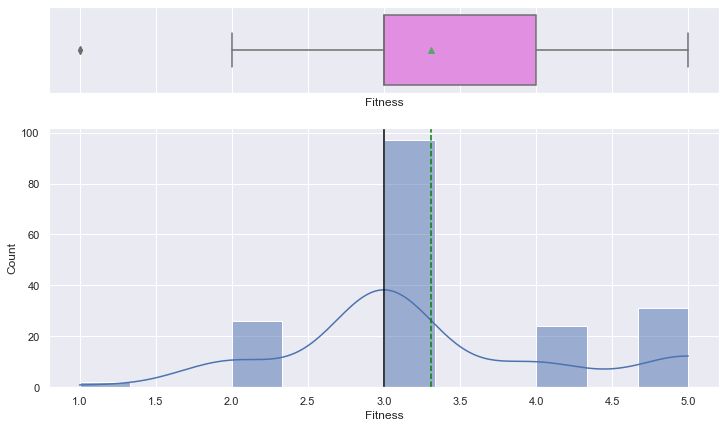

In [19]:
# Plot the boxplot and histogram of Fitness on the same scale
histogram_boxplot(df, 'Fitness')
plt.savefig('fit_hist_box.jpg', bbox_inches='tight')

### Observations
* Data is positively skewed
* Outlier(s) in negative direction
* Q1 = Q2
* Mean is slightly higher than median
* More than half the customers rate their fitness as 3

## Observations on Income

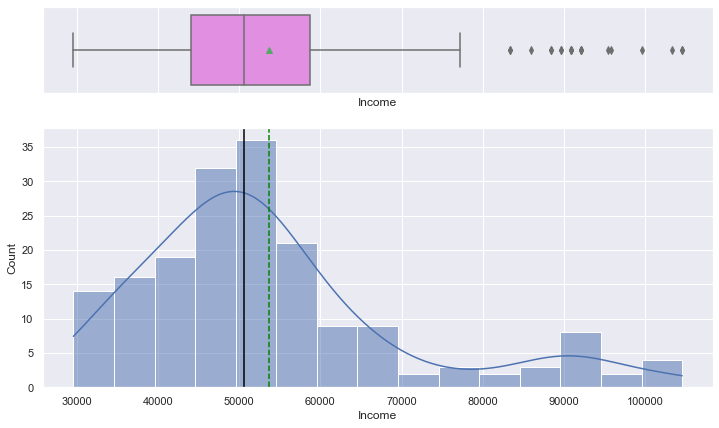

In [20]:
# Plot the boxplot and histogram of Income on the same scale
histogram_boxplot(df, 'Income')
plt.savefig('income_hist_box.jpg', bbox_inches='tight')

### Observations
* Income is positively skewed
* There are many outliers
* Minimum is approximately 30K
* Median is close to 51K and mean is close to 54K
* Whisker ends approx 77K but outliers continue to max ~ 100K
* Curve looks similar to age, which suggests correlation between the two variables

## Observations on Miles

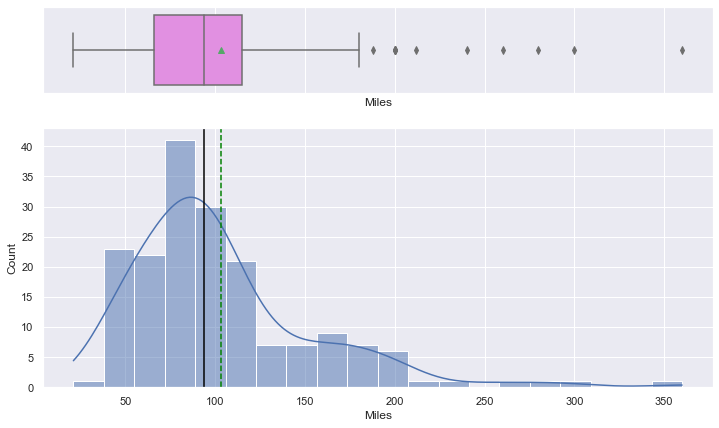

In [21]:
# Plot the boxplot and histogram of Miles on the same scale
histogram_boxplot(df, 'Miles')
plt.savefig('miles_hist_box.jpg', bbox_inches='tight')

### Observations
* Miles is positively skewed
* Whisker ends at approx 175, but outliers >350

## Explore categorical variables

In [22]:
# function to create labeled barplots provided by Great Learning


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=((count + 1)*2, 5))
    else:
        plt.figure(figsize=((n + 1)*2, 5))

    plt.xticks(rotation=45, fontsize=15)
    
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Observations on Product

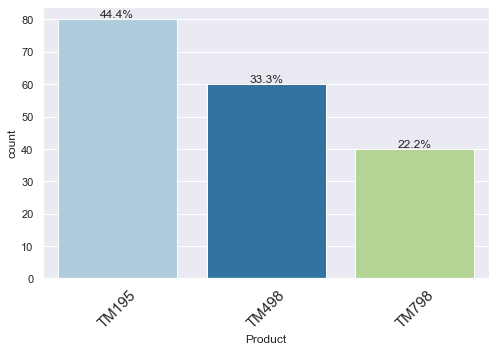

In [23]:
# Create labeled barplot of Product
labeled_barplot(df, 'Product', perc=True)

### Observations
* TM195 is the most popular product
* TM798 is the least popular product

## Observations on Gender

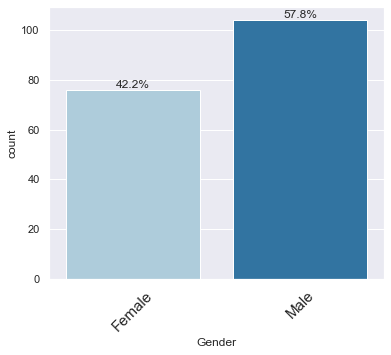

In [24]:
# Create labeled barplot of Gender
labeled_barplot(df, 'Gender', perc=True)

### Observations
* More of the customers who have purchased this product are men
* It would be interesting to compare it to the overall clientele of the store

## Observations on Marital Status

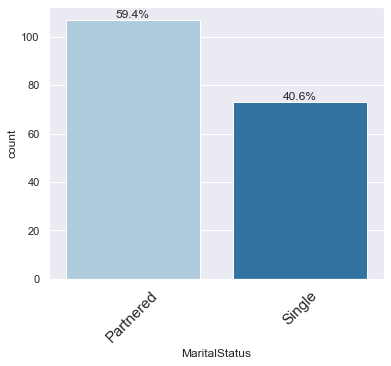

In [25]:
# Create labeled barplot of Marital Status
labeled_barplot(df, 'MaritalStatus', perc=True)

### Observations
* More of the customers who have purchased this product are partnered than single
* It would be interesting to compare it to the overall clientele of the store

## Bivariate Analysis
Try to determine relationship between variables from the bivariate charts

## Correlation

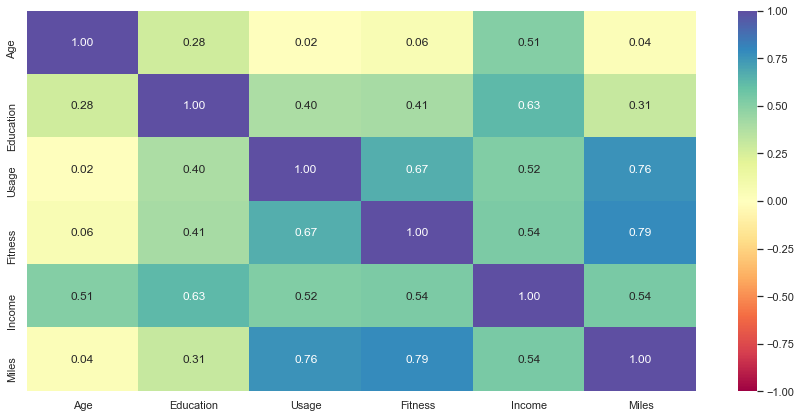

In [26]:
# Check for correlation between numerical variables
num_var = ['Age','Education','Usage','Fitness','Income','Miles']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral', xticklabels=corr.columns, yticklabels=corr.columns)
plt.savefig('corr_heatmap.jpg', bbox_inches='tight')
plt.show()

### Observations
* Miles has a relatively high correlation with Usage and Fitness, which is not surprising
* Usage and Fitness are not as highly correlated as with Miles, but still relatively strong
* Income has a relatively strong correlation with education
* Age has the weakest correlations, followed by Education. Both have a moderate correlation with Income.
* No negative correlations

## Bivariate Scatterplots

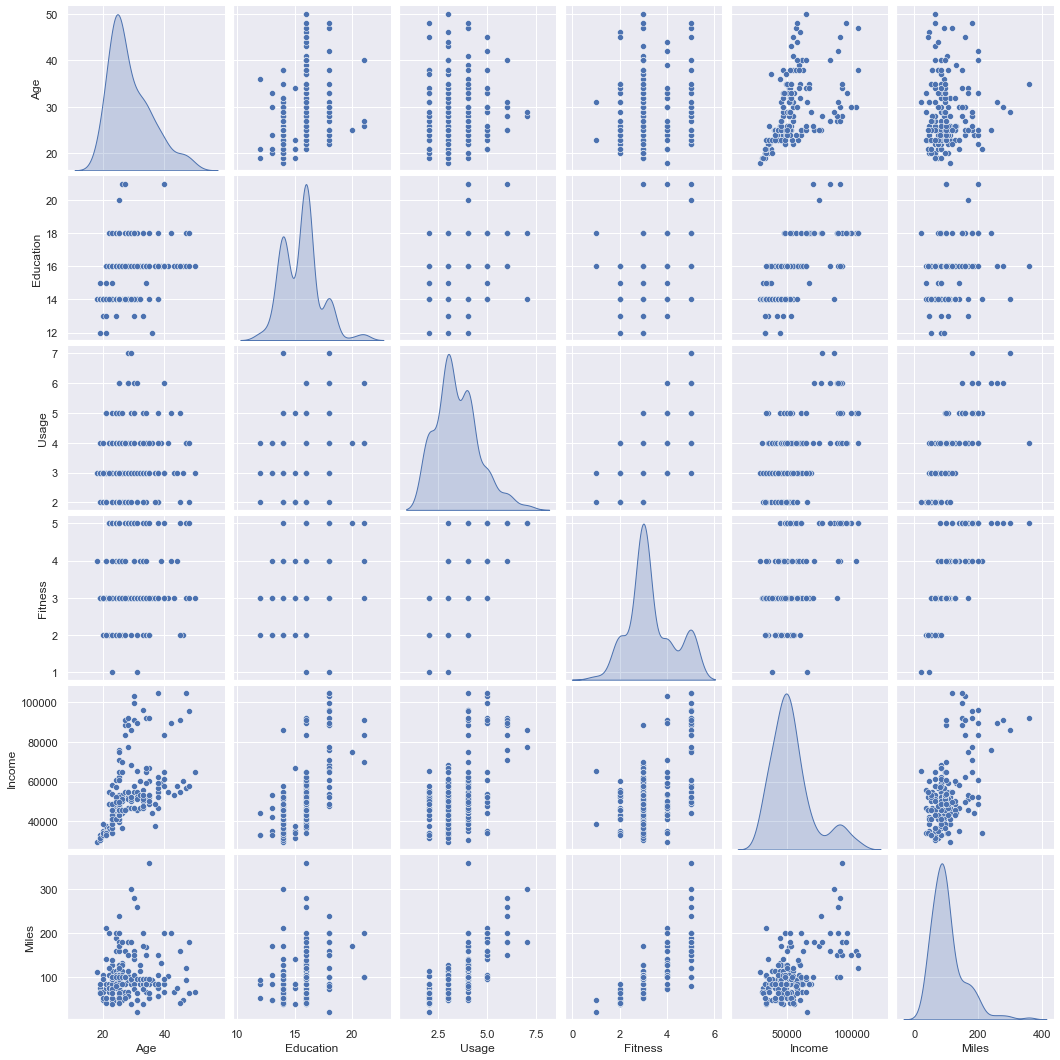

In [59]:
# get overall picture of numerical variables
sns.pairplot(data=df[num_var], diag_kind='kde')
plt.show()

### Observations
* There is not much new information, as heatmap gives us a good picture of correlations
* It may be harder to see some patterns due to discrete variables and limited data

## Relationship between Product and Numerical Variables

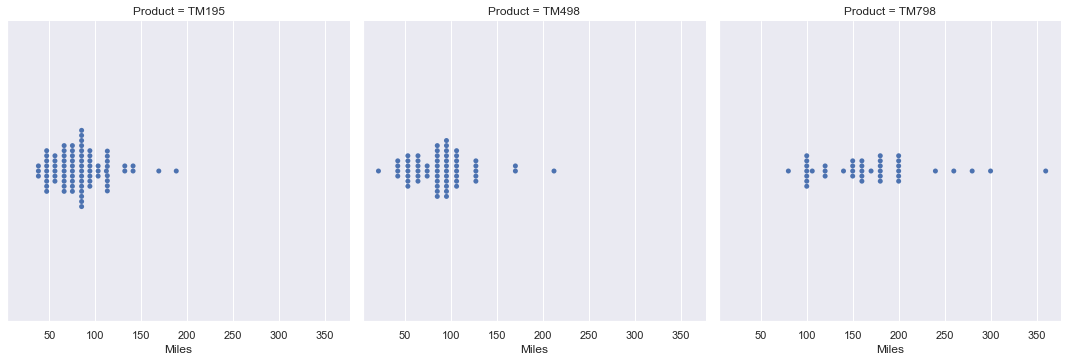

In [28]:
# Disperson of expected miles ran for each product
sns.catplot(x='Miles', col='Product',data=df, kind='swarm')
plt.savefig('prod_miles.jpg', bbox_inches='tight')
plt.show()

### Observations
* All distributions are positively skewed
* TM195 and TM498 have similar looking distributions, while TM798 seems to appeal to those who intend to use it for much more mileage

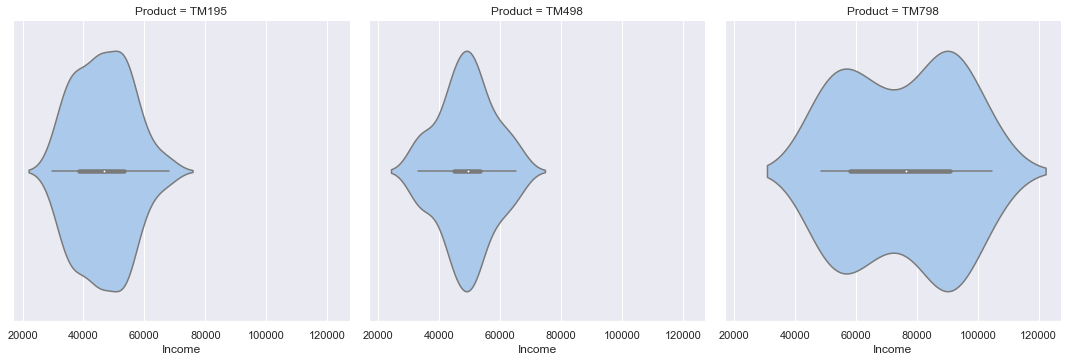

In [29]:
# Disperson of income for each product
sns.catplot(x='Income', col='Product',data=df, kind='violin', palette='pastel')
plt.savefig('prod_income.jpg', bbox_inches='tight')
plt.show()

### Observations
* TM195 and TM498 have somewhat normal distributions, with range between 20K and 80K
* TM798 appears to be bimodal with range between 30K and 125K

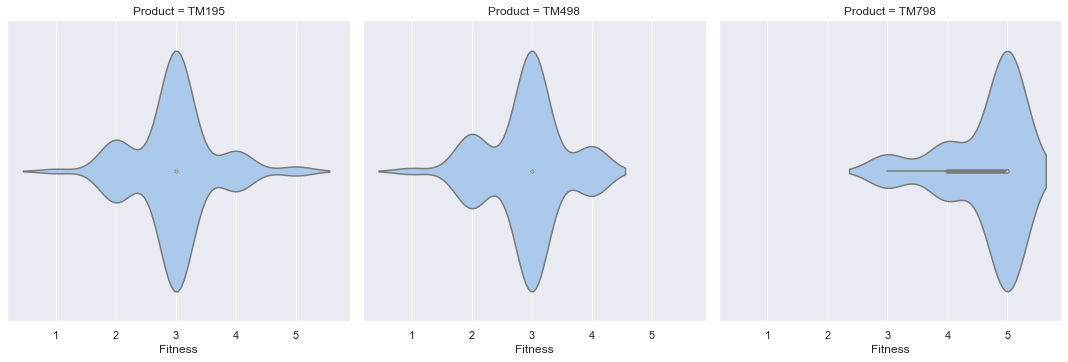

In [30]:
# Dispersion of fitness for each product
sns.catplot(x='Fitness', col='Product', data=df, kind='violin', palette='pastel')
plt.savefig('prod_fit.jpg', bbox_inches='tight')
plt.show()

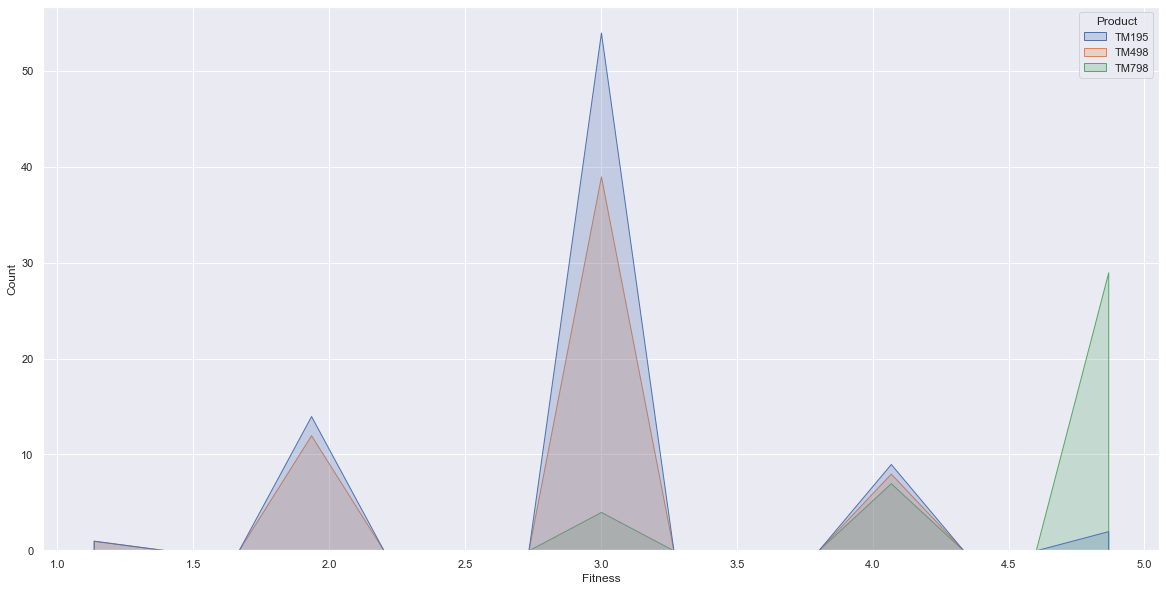

In [31]:
# Disperson of fitness for each product on one plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Fitness', hue='Product', element='poly', bins=15, fill=True)
plt.savefig('prod_fit_poly.jpg', bbox_inches='tight')
plt.show()

### Observations
* TM195 and TM498 have similar shapes, aside from the right tail present in TM195 that is absent in TM498
* TM798 is negatively skewed and the majority of values are high

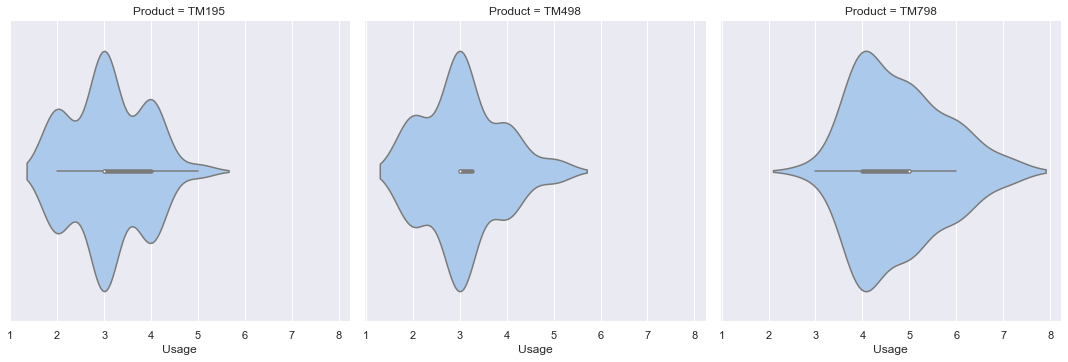

In [32]:
# Dispersion of usage for each product
sns.catplot(x='Usage', col='Product', data=df, kind='violin', palette='pastel')
plt.savefig('prod_use.jpg', bbox_inches='tight')
plt.show()

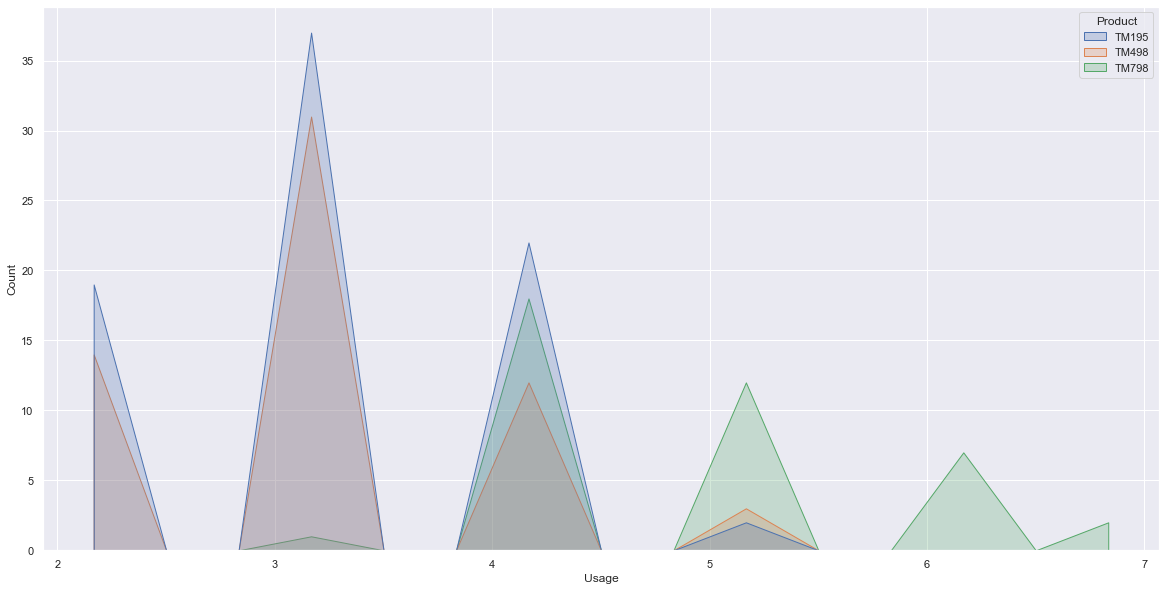

In [33]:
# Dispersion of usage for each product on one plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Usage', hue='Product', bins=15, fill=True, element='poly')
plt.savefig('prod_use_poly.jpg', bbox_inches='tight')
plt.show()

### Observation
* Usage is similar for TM195 and TM498.
* Usage for TM798 is higher overall and has a larger spread

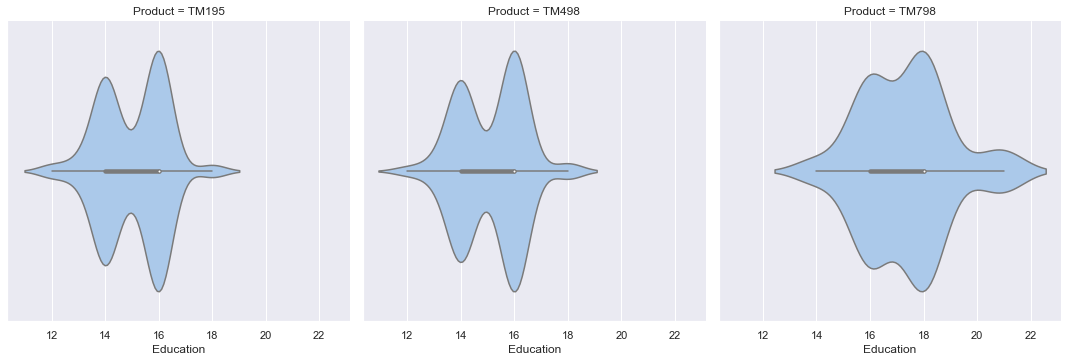

In [34]:
# Dispersion of education for each product
sns.catplot(x='Education', col='Product', data=df, kind='violin', palette='pastel')
plt.savefig('prod_ed.jpg', bbox_inches='tight')
plt.show()

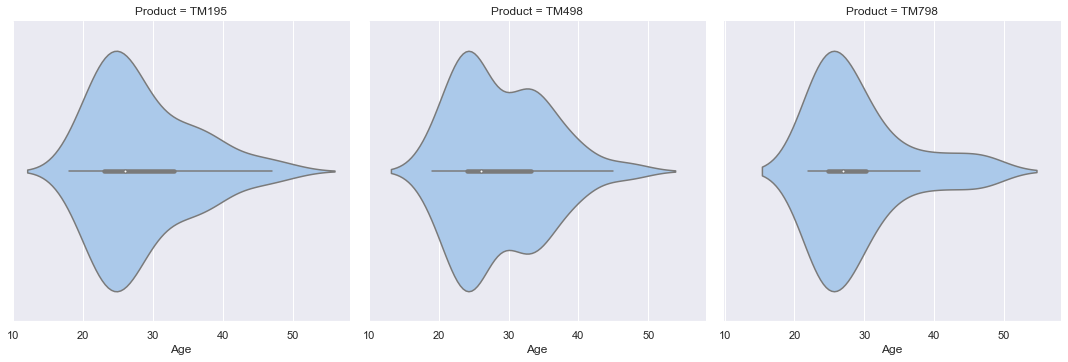

In [35]:
# Dispersion of age for each product
sns.catplot(x='Age', col='Product', data=df, kind='violin', palette='pastel')
plt.savefig('prod_age.jpg', bbox_inches='tight')
plt.show()

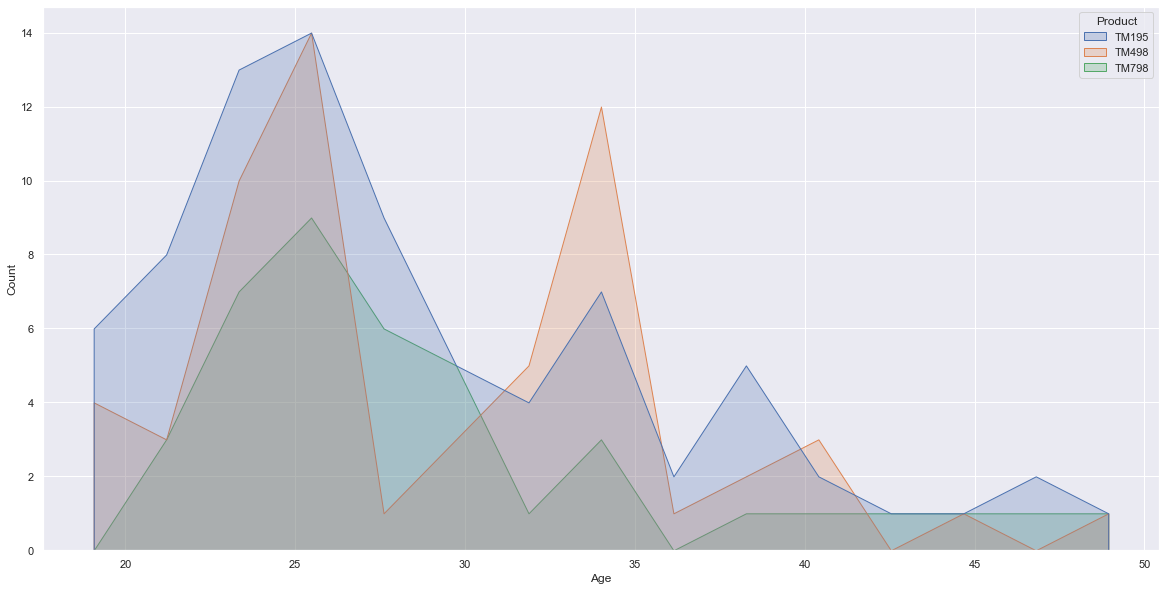

In [36]:
# Dispersion of age for each product, in one plot
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Age', hue='Product', element='poly', bins=15)
plt.savefig('prod_age_poly.jpg', bbox_inches='tight')
plt.show()

## Relationship between Product and Gender

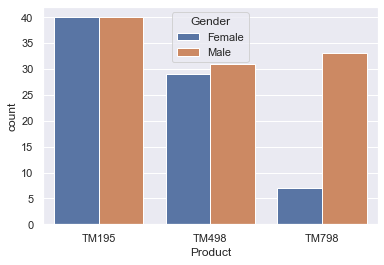

In [37]:
sns.countplot(data=df, x='Product', hue='Gender')
plt.savefig('prod_gender.jpg', bbox_inches='tight')

### Observations
* Just as many females use TM195 as males
* Much fewer females use TM798 as males (in both absolute and relative terms)

## Relationship between Product and Marital Status

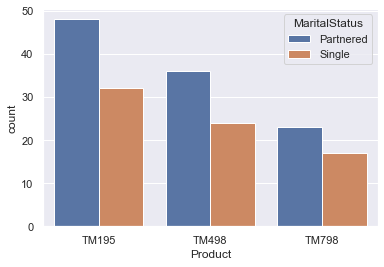

In [38]:
# count from each products, by gender
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.savefig('prod_ms.jpg', bbox_inches='tight')

# Multivariate Analysis

## Create bins for age groups and education

In [39]:
# create under 30's, 30's, 40's, 50+ age groups
df['Age_cut'] = pd.cut(df.Age, 
                        bins=[0,19,29,39,49,59],
                        labels=['teens','20s','30s','40s', '50'])
df['Age_cut'].unique()

['teens', '20s', '30s', '40s', '50']
Categories (5, object): ['teens' < '20s' < '30s' < '40s' < '50']

In [40]:
# create groups based on level of education
df['Ed_cut'] = pd.cut(df.Education,
                     bins=[0,12,14,16,18,22],
                     labels=['HS','Associates','Bachelors','Masters','PostGrad'])

In [41]:
# look at first few rows of dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cut,Ed_cut
0,TM195,18,Male,14,Single,3,4,29562,112,teens,Associates
1,TM195,19,Male,15,Single,2,3,31836,75,teens,Bachelors
2,TM195,19,Female,14,Partnered,4,3,30699,66,teens,Associates
3,TM195,19,Male,12,Single,3,3,32973,85,teens,HS
4,TM195,20,Male,13,Partnered,4,2,35247,47,20s,Associates


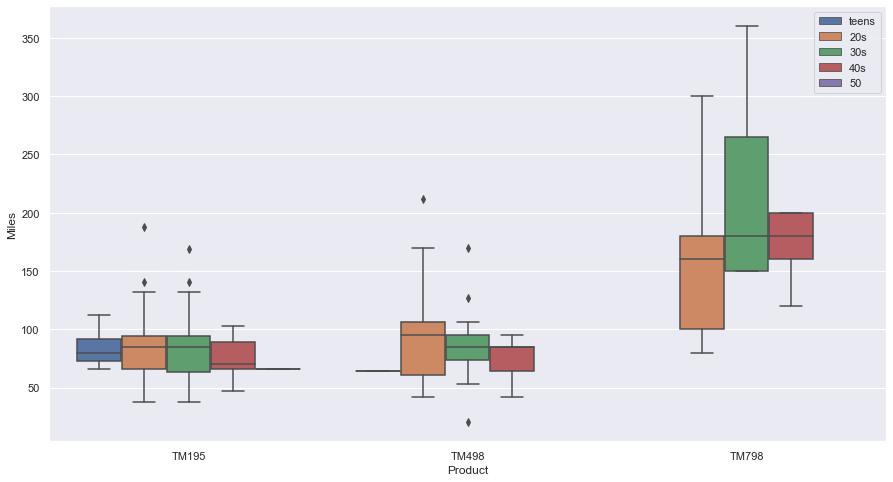

In [42]:
# boxplot of miles per product, broken down by age groups
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Product', y='Miles', hue='Age_cut')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('prod_miles_age_cut.jpg', bbox_inches='tight')
plt.show()

### Observations
* TM498 & TM798 do not appeal to customers under 20 years old.
* Customers who intend to run more miles tend to purchase TM798, in particular customers in their 30s
* Customers in their 30s plan to run the most miles, followed by those in their 20s

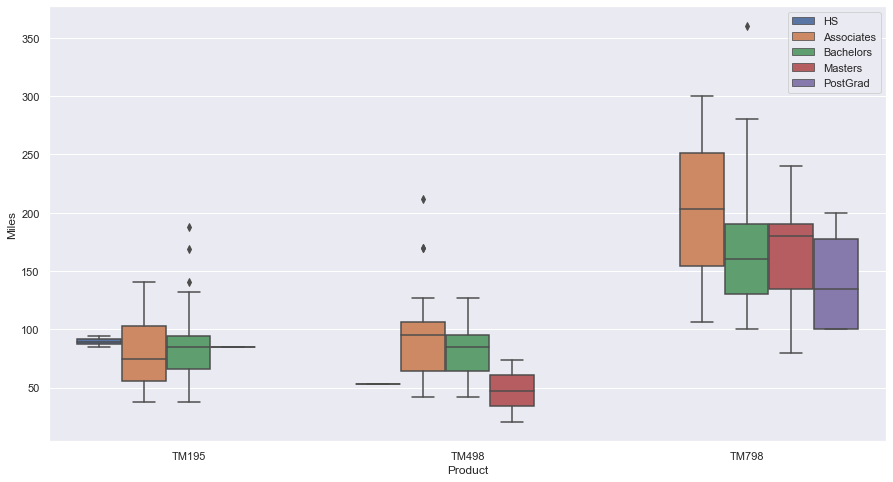

In [43]:
# boxplot of miles per product, broken down by education groups 
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Product', y='Miles', hue='Ed_cut')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('prod_miles_ed_cut.jpg', bbox_inches='tight')
plt.show()

### Observations
* Customers with education beyond bachelors do not tend to purchase TM195
* Highest educated customers tend to purchase TM798

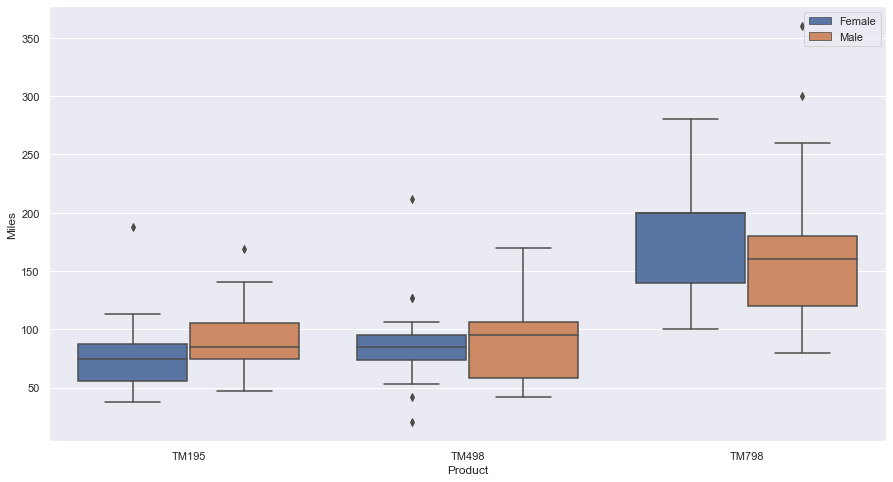

In [44]:
# boxplot of miles per product, broken down by gender
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Product', y='Miles', hue='Gender')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('prod_miles_gender.jpg', bbox_inches='tight')
plt.show()

### Observations
* Of those who purchase TM798, women plan to run more miles, whereas the opposite is true for the other models

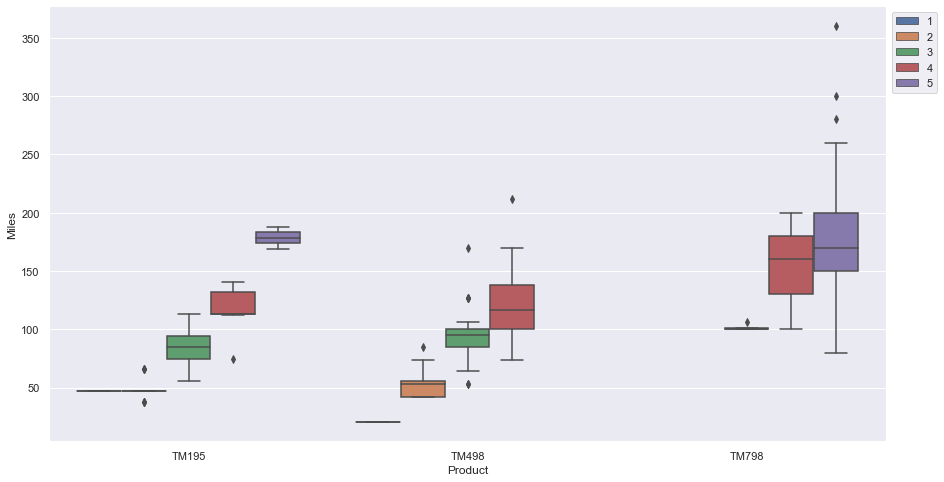

In [45]:
# boxplot of miles per product, broken down by fitness score
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Product', y='Miles', hue='Fitness')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('prod_miles_fit.jpg', bbox_inches='tight')
plt.show()

### Observations
* As model number increases, the spread increases for the miles expected to run per fitness score

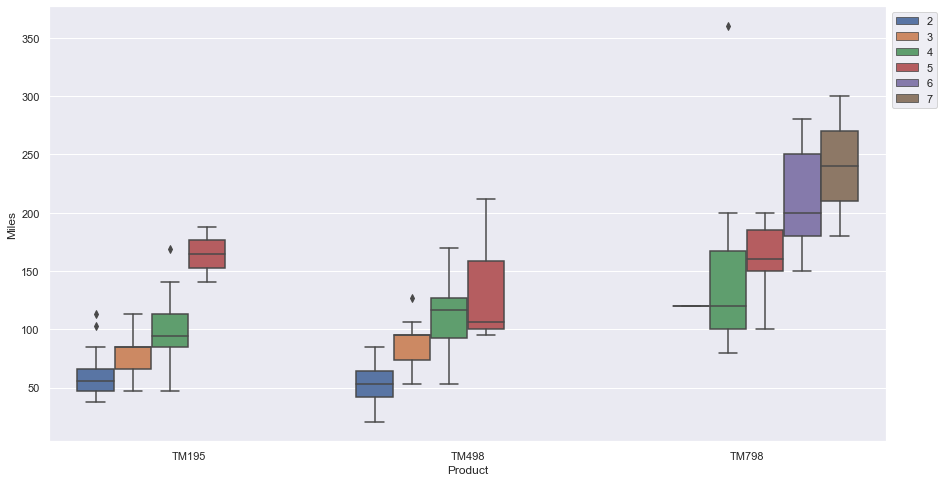

In [46]:
# boxplot of miles per product, broken down by usage
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Product', y='Miles', hue='Usage')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('prod_miles_use.jpg', bbox_inches='tight')
plt.show()

### Observations
* Daily users buy TM798

# Targeting High Usage Customers

In [47]:
# create subset of the dataset for those who plan to use the treadmill at least 4 times per week
df_usage = df.loc[df['Usage']>=4]

# view the first 5 entries
df_usage.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cut,Ed_cut
2,TM195,19,Female,14,Partnered,4,3,30699,66,teens,Associates
4,TM195,20,Male,13,Partnered,4,2,35247,47,20s,Associates
8,TM195,21,Male,15,Single,5,4,35247,141,20s,Bachelors
12,TM195,22,Female,16,Single,4,3,36384,75,20s,Bachelors
17,TM195,23,Male,16,Partnered,4,3,39795,94,20s,Bachelors


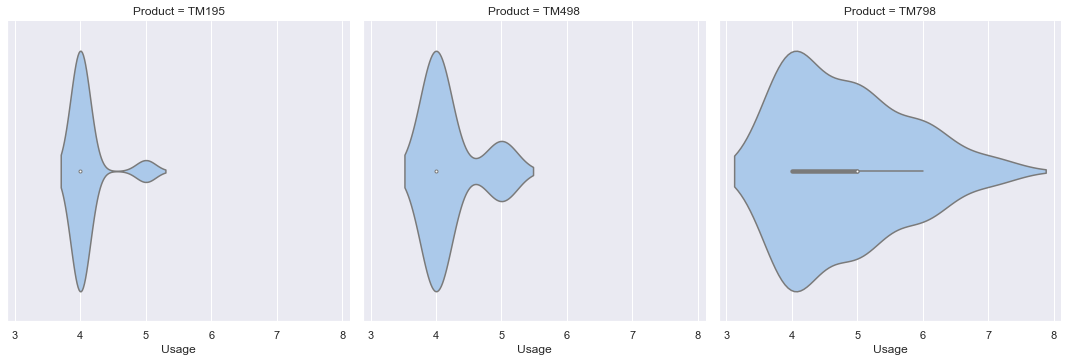

In [48]:
# Check dispersion of Usage between products for high usage customers
sns.catplot(x='Usage', col='Product', data=df_usage, kind='violin', palette='pastel')
plt.savefig('prod_high_use.jpg', bbox_inches='tight')
plt.show()

### Observations
* Higher model numbers have increasingly more high usage customers
* Notably, TM798 has far more high usage customers

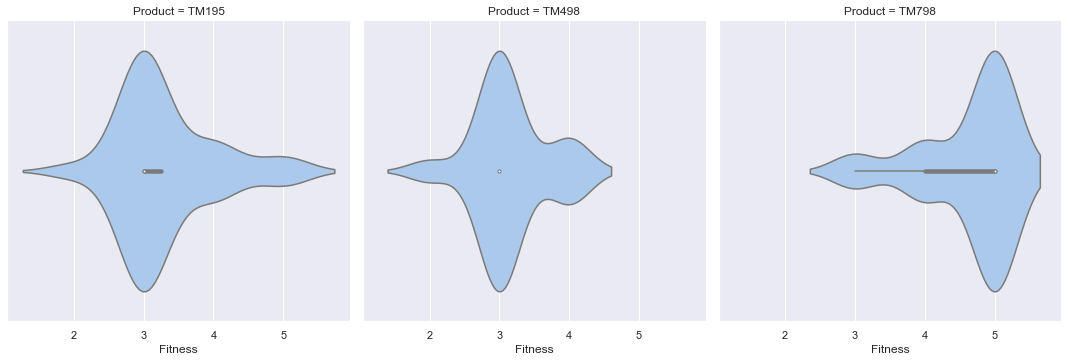

In [49]:
# Check dispersion of Fitness between products for high usage customers
sns.catplot(x='Fitness', col='Product', data=df_usage, kind='violin', palette='pastel')
plt.savefig('prod_high_use_fit.jpg', bbox_inches='tight')
plt.show()

### Observations
* TM195 positively skewed
* TM498 looks similar to TM195 but truncated in the positive direction
* TM798 negatively skewed
* TM798 has notably higher fitness scores

In [50]:
# create a subset of the data containing high usage, above average fitness customers
fit_usage = df_usage[df_usage['Fitness']>=4]
# view first few rows
fit_usage.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cut,Ed_cut
8,TM195,21,Male,15,Single,5,4,35247,141,20s,Bachelors
23,TM195,24,Female,16,Partnered,5,5,44343,188,20s,Bachelors
39,TM195,26,Male,16,Partnered,4,4,44343,132,20s,Bachelors
53,TM195,30,Male,14,Partnered,4,4,46617,141,30s,Associates
61,TM195,34,Male,16,Single,4,5,51165,169,30s,Bachelors


In [51]:
# find the number of customers with high usage and fitness score who purchased TM195
len(fit_usage[fit_usage['Product']=='TM195'])

6

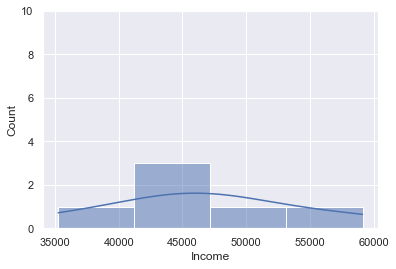

In [52]:
# plot histogram of income for customers who use TM195 with high usage and fitness score
sns.histplot(data=fit_usage[fit_usage['Product']=='TM195'], x='Income', kde=True)
plt.ylim(0,10)
plt.savefig('target_195.jpg', bbox_inches='tight')

In [53]:
# find the number of customers with high usage and fitness score who purchased TM498
len(fit_usage[fit_usage['Product']=='TM498'])

3

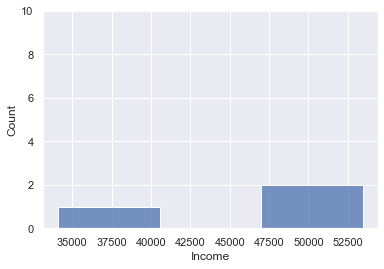

In [54]:
# plot histogram of income for customers who use TM498 with high usage and fitness score
sns.histplot(data=fit_usage[fit_usage['Product']=='TM498'], x='Income')
plt.ylim(0,10)
plt.savefig('target_498.jpg', bbox_inches='tight')

In [55]:
# find the number of customers with high usage and fitness score who purchased TM798
len(fit_usage[fit_usage['Product']=='TM798'])

35

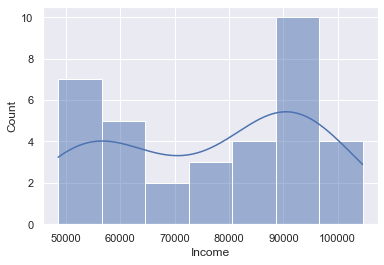

In [56]:
# plot histogram of income for customers who use TM798 with high usage and fitness score
sns.histplot(data=fit_usage[fit_usage['Product']=='TM798'], x='Income', kde=True)
plt.savefig('target_798.jpg', bbox_inches='tight')

### Observations
* Those who have high usage and fitness scores tend to purchase TM798
* Customers with high usage and fitness scores who purchased TM195 and TM498 have lower income

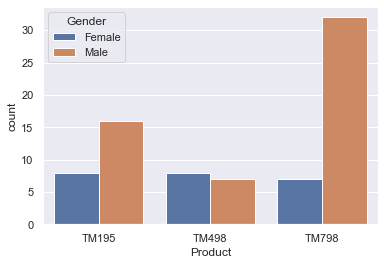

In [57]:
# count plot of high usage customers across models by gender
sns.countplot(data=df_usage, x='Product', hue='Gender')
plt.savefig('prod_gender_count.jpg', bbox_inches='tight')

### Observations
* High usage females are not as affected by model number
* High usage males tend to purchase TM798 most, TM195 about half frequency of TM798, and TM495 least of all